# Text

## Objectives

- [ ] String indexing and immutability
- [ ] The `string` module
- [ ] Manipulating text strings
- [ ] Formatting text strings
- [ ] Text I/O
- [ ] Working with Unicode
- [ ] Text to arrays

## Strings

- Point index
- Interval index
- Negative index
- Stride
- Reversing a string
- Strings are immutable


### References

- [String formats](https://docs.python.org/3.7/library/string.html)
- [String methods](https://docs.python.org/3.7/library/stdtypes.html#string-methods)
- [Regular expressions](https://docs.python.org/3.7/library/re.html)
- [File I/O](https://docs.python.org/3.7/library/io.html#io-overview)

In [ ]:
s = "hello world"

In [ ]:
s[0], s[6]

In [ ]:
s[0:6]

In [ ]:
s[-1], s[-3]

In [ ]:
s[::2]

In [ ]:
s[::-1]

In [ ]:
try:
    s[0] = 'H'
except TypeError as e:
    print(e)

## The `string` module

- String constants
- String `capwords`

In [ ]:
import string

In [ ]:
string.digits

In [ ]:
string.ascii_letters

In [ ]:
string.punctuation

In [ ]:
string.whitespace

In [ ]:
string.printable

### Orphan function in strings module

In [ ]:
string.capwords(s)

## String methods

### Methods to change case

In [ ]:
s.upper()

In [ ]:
s.lower()

In [ ]:
'ß'.casefold()

In [ ]:
s.capitalize()

In [ ]:
s.title()

Difference between `title` method and `capwords` function

In [ ]:
'hello:world'.title()

In [ ]:
string.capwords('hello:world')

In [ ]:
string.capwords('hello:world', sep=':')

### String predicates

In [ ]:
s.isalnum()

In [ ]:
s.isalpha()

In [ ]:
s.isnumeric()

In [ ]:
s.isidentifier()

In [ ]:
s.isprintable()

In [ ]:
s.startswith('hell')

In [ ]:
s.endswith('ld')

### Searching and counting

In [ ]:
'llo' in s

In [ ]:
'foo' in s

In [ ]:
s.find('llo')

In [ ]:
s.index('llo')

In [ ]:
s.find('foo')

In [ ]:
try:
    s.index('foo')
except ValueError as e:
    print(e)

In [ ]:
s.count('l')

In [ ]:
s.count('ll')

### Stripping

In [ ]:
'   hello world   '.strip()

In [ ]:
'   hello world   '.lstrip()

In [ ]:
'   hello world   '.rstrip()

### Splitting and joining

In [ ]:
s.split()

In [ ]:
s.split('l')

In [ ]:
'-'.join(s)

In [ ]:
'-'.join(s.split())

In [ ]:
'l'.join(s.split('l'))

### Translation

In [ ]:
'GATTACA'.translate(str.maketrans('ACTG', 'TAGC'))

In [ ]:
'GATTACA'.translate(str.maketrans('', '', 'AC'))

In [ ]:
'GATTACA'.translate(str.maketrans(string.ascii_uppercase, string.ascii_lowercase))

### `ord` and `chr`

In [ ]:
ord('A'), ord('a')

In [ ]:
chr(65), chr(97)

In [ ]:
chr(ord('B') + (ord('a') - ord('A')))

## Formatting strings

### C sytle formatting

In [ ]:
pi = 3.141592653589793
r = 2

In [ ]:
'area = %f * %d^2' % (pi, r)

Precision and padding

In [ ]:
'area = %8.2f * %03d^2' % (pi, r)

Right align string

In [ ]:
'%10s = %8.2f * %03d^2' % ('area', pi, r)

Left align string

In [ ]:
'%-10s = %8.2f * %03d^2' % ('area', pi, r)

### Using the `format` method

```python
"{" [field_name] ["!" conversion] [":" format_spec] "}"
```

In [ ]:
'{big:,}'.format(big=int(1e9))

In [ ]:
'{pct:.1%}'.format(pct=0.5)

In [ ]:
'area = {} * {}^2'.format(pi, r)

In [ ]:
'area = {a} * {b}^2'.format(a=pi, b=r)

In [ ]:
'area = {pi:8,.4} * {r:06d}^2'.format(pi=pi, r=r)

In [ ]:
'{:>10}'.format('area')

In [ ]:
'{:<10}'.format('area')

In [ ]:
'{:^10}'.format('area')

In [ ]:
'{:=^10}'.format('area')

In [ ]:
import datetime

now = datetime.datetime.now()
'{:%a, %d %b %Y: %H:%M %p}'.format(now)

### Using f strings

In [ ]:
f'area = {pi} * {r}^2'

In [ ]:
x = 'area'
f'{x:=^10}'

### Templates

In [ ]:
from string import Template

In [ ]:
t = Template("$who likes $what")
items = [('ann', 'Python'), ('bob', 'R'), ('cody', 'C++')]
for name, lang in items:
    print(t.substitute(who=name, what=lang))

In [ ]:
items = [('ann', 'Python'), ('bob', 'R'), ('cody', 'C++')]
for name, lang in items:
    print("{} likes {}".format(name, lang))

In [ ]:
items = [('ann', 'Python'), ('bob', 'R'), ('cody', 'C++')]
for name, lang in items:
    print(f"{name} likes {lang}")

## Encodings

1. There ain't no such thing as plain text
2. Text is composed of
    1. Letters (Platonic ideal)
    2. Code points (an integer)
    3. Encodings (how the integer is written in memory)
3. Python 3 defaults to Unicode UTF-8 encoding (Unicode code points in Python look like `\uxxxx` where `x` is hexadecimal)
4. To see the bytes from an encoding, use the `encode` method
5. To see the letter from bytes, use the `decode` method
6. You can specify the encoding as an optional argument in the `open` function
7. You can use Unicode in variable names

### Unicode strings

In [ ]:
print('hello \u732b')

In [ ]:
s = '猫'
print(f'hello {s}')

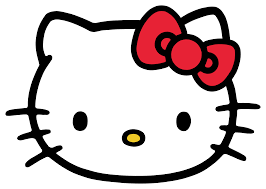

### Byte strings

In [ ]:
kitty = '小' + '猫'

In [ ]:
print(f'hello {kitty}')

In [ ]:
kitty_bytes = kitty.encode('utf8')
kitty_bytes

In [ ]:
kitty_bytes.decode('utf8')

In [ ]:
try:
    kitty_bytes.decode('ascii')
except UnicodeDecodeError as e:
    print(e)

In [ ]:
for suit in '\u2660	\u2665	\u2666	\u2663	\u2664	\u2661	\u2662	\u2667'.split():
    print(suit, end=',')

### Unicode variable names

In [ ]:
αβγδϵ = 23

In [ ]:
ΑΒΓΔΕ = 42

In [ ]:
(ŷ, ÿ, ỹ, ȳ, y̅, y̆, y̌, y̲) = range(8)

In [ ]:
α⃗, α⃖, α⃡, α⃐, α⃑ = range(5)

In [ ]:
ℜ = 'real'

### Reading and writing text files

In [ ]:
%%file haiku.txt
古池や蛙飛び込む水の音
ふるいけやかわずとびこむみずのおと

#### Context manager

A context manager is a class that does some automatic activity on entry and exit. It can be written most easily using a standard library decorator.

In [ ]:
class CMDemo:
    """Demo of context manager."""
    
    def __init__(self, name):
        self.name = name
        
    def __enter__(self):
        print("Entering %s" % self.name)
        
    def __exit__(self, *args):
        print("Exiting %s" % self.name)

In [ ]:
with CMDemo('foo'):
    print('foo')

In [ ]:
from contextlib import contextmanager

@contextmanager
def tag(name):
    print("<%s>" % name)
    yield
    print("</%s>" % name)

In [ ]:
with tag('foo'):
    print('Hello')

It is good practice to use `open` as a context manager for file I/O so we don't forget to close it. The old practice looks something like

```python
f = open('foo.txt')
# do stuff with f over many lines
f.close()
```

The trouble is that people forget to close `f` and there are only a finite number of file handlers provided by the operating system, and programs can crash if that number is exceeded.

In [ ]:
with open('haiku.txt') as f:
    for line in f:
        print(line, end='')

In [ ]:
with open('haiku.txt') as f:
    haiku = f.read()

In [ ]:
haiku

In [ ]:
haiku.split()

In [ ]:
with open('haiku_alt.txt', 'w') as f:
    f.write(haiku)

In [ ]:
! cat haiku_alt.txt

## Using regular expressions

- Read [Regular Expression HOWTO](https://docs.python.org/3/howto/regex.html)
- Practice at https://regex101.com
- Play [RegEx Golf](https://alf.nu/RegexGolf)

![golf](https://www.explainxkcd.com/wiki/images/7/7b/regex_golf.png)

In [ ]:
import re

### Matching Characters

In [ ]:
beer = '''99 bottles of Beer on the wall, 99 bottles of beeR.
Take one down and pass it around, 98 bottles of beer on the wall.'''

In [ ]:
re.findall('beer', beer)

In [ ]:
re.findall('beer', beer, re.IGNORECASE)

In [ ]:
re.findall('on', beer)

### Alternatives

In [ ]:
re.findall('bottles|beer', beer, re.IGNORECASE)

### Word boundaries

In [ ]:
re.findall(r'\bon\b', beer)

In [ ]:
re.findall(r'.', beer)[-10:]

### Character sets

In [ ]:
re.findall(r'\d', beer)

In [ ]:
re.findall(r'[0-9]', beer)

In [ ]:
re.findall(r'\w', beer)[11:25]

### Repeating Things

In [ ]:
re.findall(r'\d+', beer)

In [ ]:
re.findall(r'b.+r', beer)

In [ ]:
re.findall(r'be+', beer)

In [ ]:
re.findall(r'be*', beer)

In [ ]:
re.findall(r'b[aeiou]+', beer)

In [ ]:
re.findall(r'b[aeiou]{2,}', beer)

In [ ]:
re.findall(r'b[aeiou]{1}', beer)

### Finding matches

In [ ]:
for m in re.finditer('beer', beer, re.IGNORECASE):
    print(m.start(), m.end(), m.span(),  m.group())    

### Grouping

In [ ]:
re.findall(r'(\d+)\s+(\b\w+?\b)', beer, re.IGNORECASE)

### Splitting

In [ ]:
re.split(r'\d+', beer)

### Search and replace

In [ ]:
print(re.sub('beer', 'whiskey', beer, flags=re.IGNORECASE))

In [ ]:
print(re.sub(r'(\d+)\s+(\b\w+?\b)', r'\2 \1', beer, re.IGNORECASE))

### Function versus compiled method

In [ ]:
pattern = re.compile(r'(\d+)\s+(\b\w+?\b)')
pattern.findall(beer)

### Raw strings

The backslash `\` is an escape character in a regular Python string. So we need to escape it to match a literal `\`. However, `\` is an escape character in the regular expression mini-language when compiling the regular expression pattern. So we need to escape at two levels - hence we need `\\\\` to match a literal `\`. The raw string r`foo` treats `\` as a literal character rather than an escape character. 

In [ ]:
latex = 'latex uses \section over and over again like so \section'

In [ ]:
re.findall('\section', latex)

In [ ]:
re.findall('\\section', latex)

In [ ]:
re.findall('\\\\section', latex)

In [ ]:
re.findall(r'\\section', latex)

## Examples

### Removing punctuation

In [ ]:
ss = 'What the #$@&%*! does your code mean?'

Using a comprehension

In [ ]:
''.join(s for s in ss if not s in string.punctuation)

Using a built-in function

In [ ]:
ss.translate(str.maketrans('','', string.punctuation))

Using a regular expression

In [ ]:
pat = re.compile('[%s]' % re.escape(string.punctuation))

In [ ]:
pat.sub('', ss)

#### Timing

In [ ]:
%timeit ''.join(s for s in ss if not s in string.punctuation)

In [ ]:
%timeit ss.translate(str.maketrans('','', string.punctuation))

In [ ]:
%timeit pat.sub('', ss)

### Custom version of `capwords`

In [ ]:
string.capwords('hello    world')

In [ ]:
def my_capwords(ss):
    return ' '.join([s.title() for s in ss.split()])

In [ ]:
my_capwords('hello    world')

### Bag of words

Create a table of counts, where rows represent unique words and columns represent different documents. Ignore case and capitalization.

In [ ]:
doc1 = """The wheels on the bus go,
Round and round,
Round and round,
Round and round.
The wheels on the bus go
Round and round,
All through the town."""

doc2 = """The doors on the bus go,
Open and shut,
Open and shut,
Open and shut.
The doors on the bus go
Open and shut,
All through the town."""

doc3 = """The Driver on the bus says,
"Move on back!
Move on back!
Move on back!"
The Driver on the bus says,
"Move on back!"
All through the town."""

doc4 = """The babies on the bus go,
"Wah, wah, wah!
Wah, wah, wah!
Wah, wah, wah!"
The babies on the bus go,
"Wah, wah, wah!"
All through the town."""

In [ ]:
docs = [doc1, doc2, doc3, doc4]
doc_words = [doc.strip().lower().translate(str.maketrans('', '', string.punctuation)).split()
             for doc in docs]
words = [word for words in doc_words for word in words]
vocab = set(words)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
table = np.zeros((len(vocab), len(docs)), dtype='int')

In [ ]:
for i, word in enumerate(vocab):
    for j, doc in enumerate(doc_words):
        table[i, j] = doc.count(word)

In [ ]:
pd.DataFrame(table, columns='doc1 doc2 doc3 doc4'.split(), index=vocab)